In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('hotel_bookings_data.csv')

# Data Description
Booking data

- Hotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled = Value indicating if the booking was canceled (1) or not (0)
- adr = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- lead_time = Number of hours that elapsed between the entering of the booking into the arrival
- arrival_date_year = Year of arrival date
- arrival_date_month = Month of arrival date
- arrival_date_week_number = Week number of year for arrival date
- arrival_date_day_of_month = Day of arrival date
- company = ID of the company/entity that made the booking or responsible for paying the booking.
- agent = ID of the travel agency that made the booking
- city = city of the hotel
- deposit_type = Indication on if the customer made a deposit to guarantee the booking.
- days_in_waiting_list = Number of days the booking was in the waiting list before it was confirmed to the customer.
- distribution_channel = Booking distribution channel.
- required_car_parking_spaces = Number of car parking spaces required by the customer
- reservation_status = Reservation last status.
- reservation_status_date = Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus
- stays_in_weekend_nights = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- total_of_special_requests = Number of special requests made by the customer (e.g. twin bed or high floor)

Customer Data

- is_repeated_guest = Value indicating if the booking name was from a repeated guest (1) or not (0)
- adults = Number of adults
- children = Number of children
- babies = Number of babies
- meal = Type of meal booked.
- customer_type = Type of booking, assuming one of four categories
- market_segment = Market segment designation.
- previous_cancellations = Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking

# Exploratory Data Analysis

## Data Preprocessing

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [29]:
cat = df.select_dtypes(include='object')
num = df.drop(columns=cat.columns)

In [30]:
cat.describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


In [31]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [32]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
34221,Resort Hotel,0,29,2019,May,10,11,2,5,2,...,1,No Deposit,240.0,NaN,0,Personal,110.00,1,0,Check-Out
59038,City Hotel,1,95,2018,December,43,20,0,3,2,...,3,No Deposit,9.0,NaN,0,Personal,132.30,0,0,Canceled
25691,Resort Hotel,0,177,2018,August,26,23,4,10,2,...,0,No Deposit,40.0,NaN,0,Contract,82.00,1,0,Check-Out
15351,Resort Hotel,0,152,2017,September,27,2,2,5,1,...,0,No Deposit,243.0,NaN,0,Contract,60.35,0,2,Check-Out
92246,City Hotel,0,153,2018,August,27,29,0,4,2,...,0,No Deposit,9.0,NaN,0,Personal,83.83,0,1,Check-Out


### Handling Missing Value

In [33]:
null = df.isna().sum().reset_index()
null = null[null[0]>0].rename(columns={'index':'column', 0:'missing'})
null

,column,missing
10,children,4
13,city,488
21,agent,16340
22,company,112593


In [34]:
df['children'].fillna(0, inplace=True)
df['city'].fillna('Others', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

### Handling Invalid Value

In [35]:
set(df['meal'])

{'Breakfast', 'Dinner', 'Full Board', 'No Meal', 'Undefined'}

In [36]:
df.loc[df['meal'] == 'Undefined', 'meal'] = 'No Meal'

### Handling Unnecessary Data

In [37]:
df['guest'] = df['adults'] + df['children'] + df['babies']

df = df[df['guest'] > 0]

<AxesSubplot:xlabel='adr'>

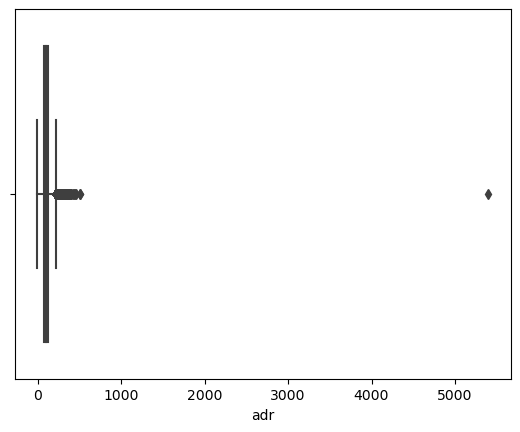

In [38]:
# Check the distribution of ard
sns.boxplot(x=df['adr'])

In [39]:
# Drop data with negative adr or more than 5000
df = df[(df['adr'] >= 0) & (df['adr'] < 5000)]

## Monthly Hotel Booking Based on Hotel Type

In [40]:
def sorted_month(df, month):
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    df_sorted = df.sort_values(by=month, key=lambda x: pd.Categorical(x, categories=month_names, ordered=True))

    return df_sorted

In [41]:
dfg = df.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).agg({'city':'count'}).rename(columns={'city':'total_booking'}).reset_index()
dfg = sorted_month(dfg, 'arrival_date_month').sort_values(['hotel', 'arrival_date_year'])
dfg

,hotel,arrival_date_year,arrival_date_month,total_booking
2,City Hotel,2017,January,1233
1,City Hotel,2017,February,1649
5,City Hotel,2017,September,1396
4,City Hotel,2017,October,2474
3,City Hotel,2017,November,3524
0,City Hotel,2017,December,3382
10,City Hotel,2018,January,3103
9,City Hotel,2018,February,2465
13,City Hotel,2018,March,1364
6,City Hotel,2018,April,2365


In [42]:
df1 = dfg.groupby(['hotel', 'arrival_date_month']).agg({'total_booking':'mean'}).reset_index()
df1 = sorted_month(df1, 'arrival_date_month')
df1

,hotel,arrival_date_month,total_booking
4,City Hotel,January,2168.000000
16,Resort Hotel,January,1217.500000
3,City Hotel,February,2057.000000
15,Resort Hotel,February,1322.500000
7,City Hotel,March,1865.000000
19,Resort Hotel,March,1095.500000
0,City Hotel,April,2475.000000
12,Resort Hotel,April,1551.000000
20,Resort Hotel,May,1666.500000
8,City Hotel,May,3216.500000


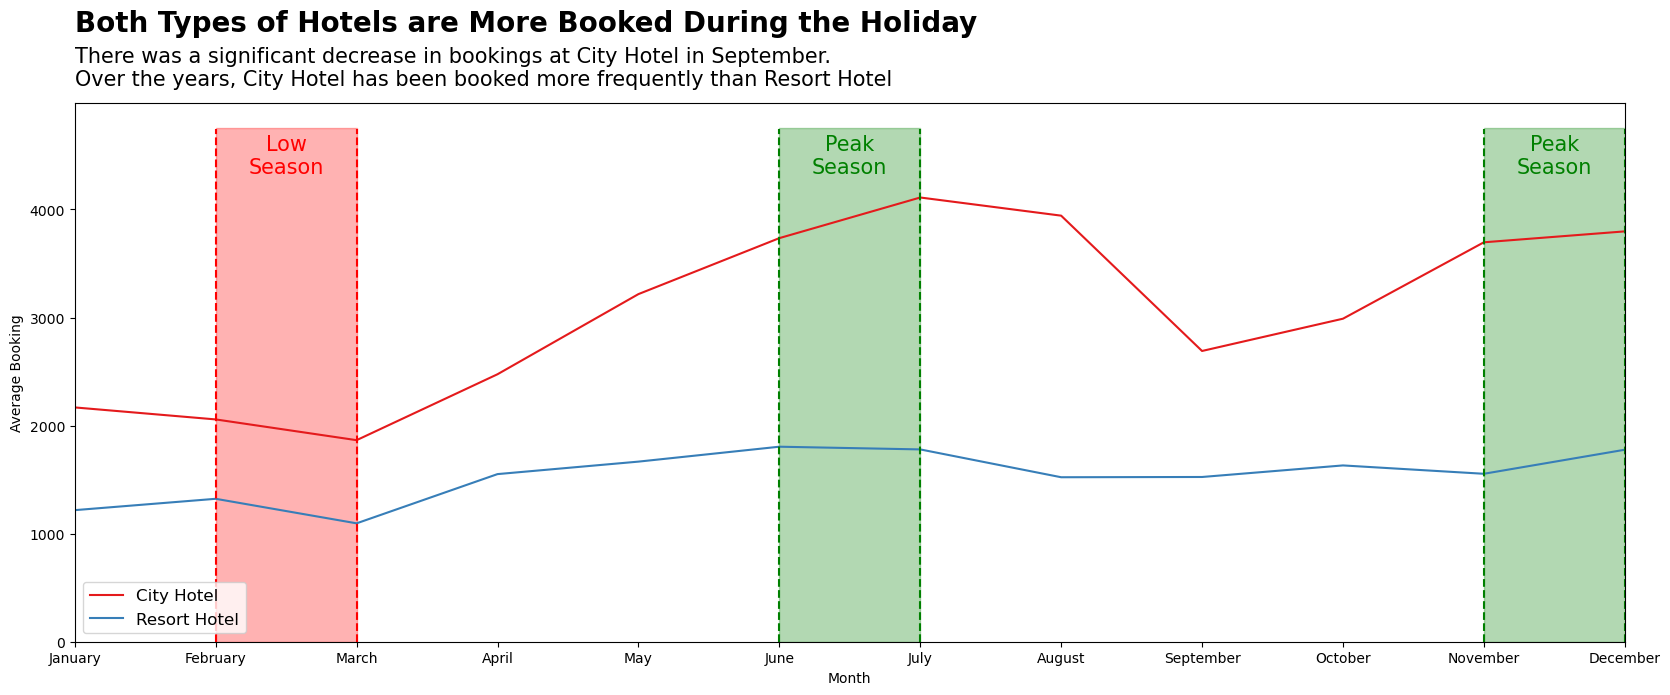

In [43]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df1, x='arrival_date_month', y='total_booking', hue='hotel', palette='Set1')
plt.text(x=0, y=5650, s='Both Types of Hotels are More Booked During the Holiday', weight='bold', fontsize=20)
plt.text(x=0, y=5150, s='There was a significant decrease in bookings at City Hotel in September. \nOver the years, City Hotel has been booked more frequently than Resort Hotel', 
         fontsize=15)
plt.ylabel('Average Booking')
plt.xlabel('Month')

plt.axvline(1, color='red', linestyle='--', ymax=0.952, ymin=0)
plt.axvline(2, color='red', linestyle='--', ymax=0.952, ymin=0)
plt.stackplot(np.arange(1,3), [4750], color='red', alpha=0.3)
plt.text(x=1.5, y=4500, s='Low\nSeason', va='center', ha='center', fontsize=15, color='red')

plt.axvline(5, color='green', linestyle='--', ymax=0.952, ymin=0)
plt.axvline(6, color='green', linestyle='--', ymax=0.952, ymin=0)
plt.stackplot(np.arange(5,7), [4750], color='green', alpha=0.3)
plt.text(x = 5.5, y = 4500, s = 'Peak\nSeason', va='center', ha='center', fontsize=15, color='green')

plt.axvline(10, color='green', linestyle='--', ymax=0.952, ymin=0)
plt.axvline(11, color='green', linestyle='--', ymax=0.952, ymin=0)
plt.stackplot(np.arange(10,12), [4750], color='green', alpha=0.3)
plt.text(x = 10.5, y = 4500, s = 'Peak\nSeason', va='center', ha='center', fontsize=15, color='green')

plt.xlim(0,11)
plt.legend(loc='best', fontsize=12)
plt.show()

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [44]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df['durations'] = df['stay_duration'].apply(lambda x: '<1 week' if x<7 else ('1-2 weeks' if x<15 else ('2-3 weeks' if x<22 else ('3-4 weeks' if x<29 else '>4 weeks'))))

category_order = ['<1 week', '1-2 weeks', '2-3 weeks', '3-4 weeks', '>4 weeks']
df['durations'] = pd.Categorical(df['durations'], categories=category_order)

In [45]:
canceled = df.groupby(['hotel', 'durations'])['is_canceled'].agg(['sum', 'count']).reset_index().rename(columns={'sum':'is_canceled', 'count':'total'})
canceled['cancel_ratio'] = canceled['is_canceled']/canceled['total']*100
canceled

,hotel,durations,is_canceled,total,cancel_ratio
0,City Hotel,<1 week,31595,75888,41.633723
1,City Hotel,1-2 weeks,1366,3122,43.754004
2,City Hotel,2-3 weeks,76,105,72.380952
3,City Hotel,3-4 weeks,21,25,84.000000
4,City Hotel,>4 weeks,20,22,90.909091
5,Resort Hotel,<1 week,7756,29447,26.338846
6,Resort Hotel,1-2 weeks,3239,10322,31.379578
7,Resort Hotel,2-3 weeks,79,169,46.745562
8,Resort Hotel,3-4 weeks,39,83,46.987952
9,Resort Hotel,>4 weeks,7,25,28.000000


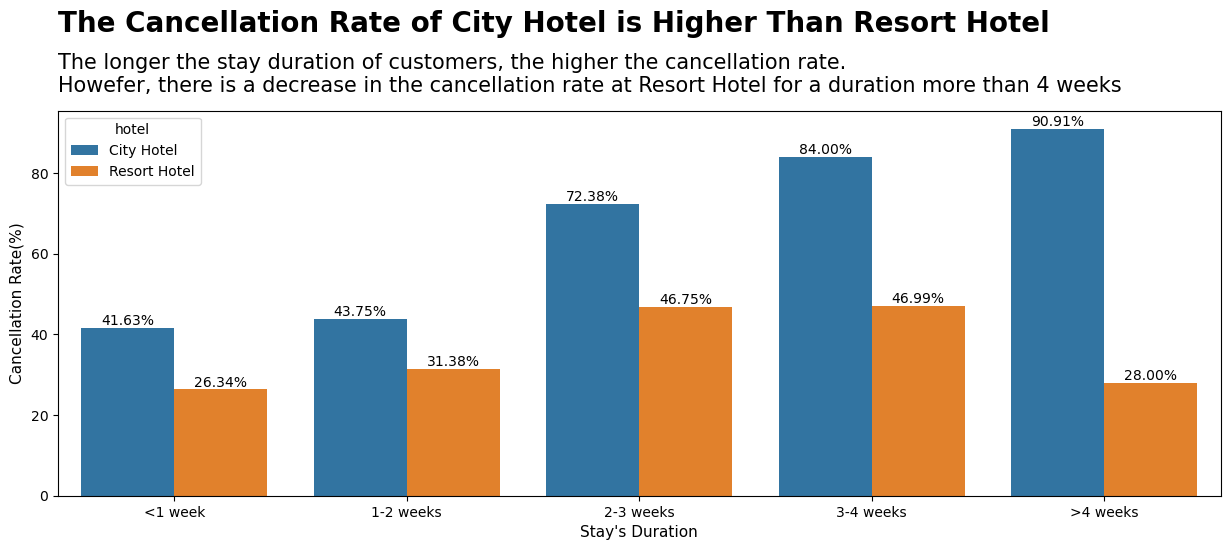

In [46]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=canceled, x='durations', y='cancel_ratio', hue='hotel')

plt.xlabel("Stay's Duration", fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[1], fmt='%.2f%%')
plt.text(x=-0.5, y=115, s='The Cancellation Rate of City Hotel is Higher Than Resort Hotel', weight='bold', fontsize=20)
plt.text(x=-0.5, y=100, s='The longer the stay duration of customers, the higher the cancellation rate. \nHowefer, there is a decrease in the cancellation rate at Resort Hotel for a duration more than 4 weeks', fontsize=15)
plt.show()

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [47]:
df['lead_duration'] = df['lead_time'].apply(lambda x: '<1 hour' if x<30 else ('1-3 hour' if x<91 else ('3-5 hour' if x<151 else ('5-7 hour' if x<181 else ('7-9 hour' if x<271 else ('9-11 hour' if x<331 else ('11-13 hour' if x<361 else '>13 hour')))))))

ordered = ['<1 hour', '1-3 hour', '3-5 hour', '5-7 hour', '7-9 hour', '9-11 hour', '11-13 hour', '>13 hour']
df['lead_duration'] = pd.Categorical(df['lead_duration'], categories=ordered)

In [48]:
cancel_lead = df.groupby(['hotel', 'lead_duration'])['is_canceled'].agg(['sum', 'count']).reset_index().rename(columns={'sum':'is_canceled', 'count':'total'})
cancel_lead['cancel_ratio'] = cancel_lead['is_canceled']/cancel_lead['total']*100
cancel_lead

,hotel,lead_duration,is_canceled,total,cancel_ratio
0,City Hotel,<1 hour,5000,22809,21.921171
1,City Hotel,1-3 hour,8483,21210,39.995285
2,City Hotel,3-5 hour,6028,13048,46.198651
3,City Hotel,5-7 hour,2716,5158,52.656068
4,City Hotel,7-9 hour,4310,8214,52.471390
5,City Hotel,9-11 hour,3463,4637,74.681906
6,City Hotel,11-13 hour,1004,1222,82.160393
7,City Hotel,>13 hour,2074,2864,72.416201
8,Resort Hotel,<1 hour,1925,15113,12.737378
9,Resort Hotel,1-3 hour,2900,8976,32.308378


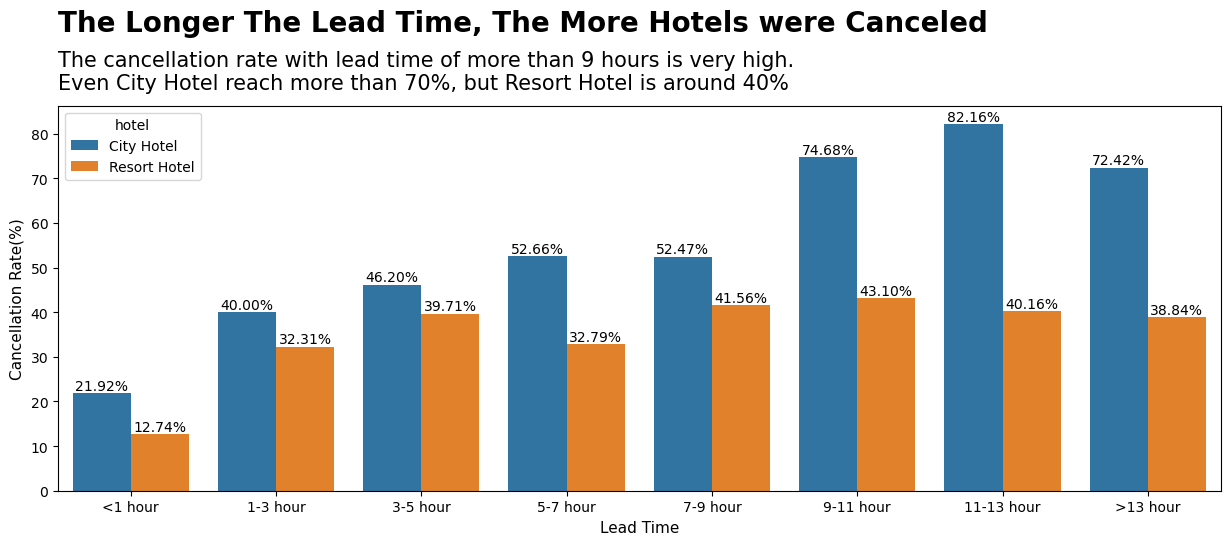

In [49]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=cancel_lead, x='lead_duration', y='cancel_ratio', hue='hotel')

plt.xlabel("Lead Time", fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[1], fmt='%.2f%%')
plt.text(x=-0.5, y=103, s='The Longer The Lead Time, The More Hotels were Canceled', weight='bold', fontsize=20)
plt.text(x=-0.5, y=90, s='The cancellation rate with lead time of more than 9 hours is very high. \nEven City Hotel reach more than 70%, but Resort Hotel is around 40%', fontsize=15)
plt.show()